In [ ]:
grep 'trades' ./logs/log.txt > ./logs/trades.txt
grep 'best_prices' ./logs/log.txt > ./logs/best_prices.txt

In [34]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [35]:
prices = pd.read_csv(r'./logs/best_prices.txt',sep = ' ',header=None)

In [36]:
prices.columns = ['data', 'event_time', 'exchange_time', 'symbol', 'ask_price', 'ask_size', 'bid_price', 'bid_size']
for i in ['ask_price', 'ask_size', 'bid_price', 'bid_size']:
    prices[i] = prices[i].astype(float)
prices['event_time'] = prices['event_time'].astype(int) 
prices['exchange_time'] = prices['exchange_time'].astype(int) 
main_index = 'event_time'
prices = prices.sort_values(main_index)
prices['main_time'] =  pd.to_datetime(prices[main_index],unit='ms')
prices = prices.set_index('main_time')

In [37]:
tr = pd.read_csv(r'./logs/trades.txt',sep = ' ',header=None)

In [39]:
tr.columns = ['data', 'event_time', 'exchange_time', 'symbol', 'price', 'size', 'side']
for i in ['price', 'size']:
    tr[i] = tr[i].astype(float)
tr['event_time'] = tr['event_time'].astype(int) 
tr['exchange_time'] = tr['exchange_time'].astype(int) 
main_index = 'event_time'
tr = tr.sort_values(main_index)
tr['main_time'] =  pd.to_datetime(tr[main_index],unit='ms')
tr = tr.set_index('main_time')

In [42]:
tr['lat'] = tr['event_time'] - tr['exchange_time']

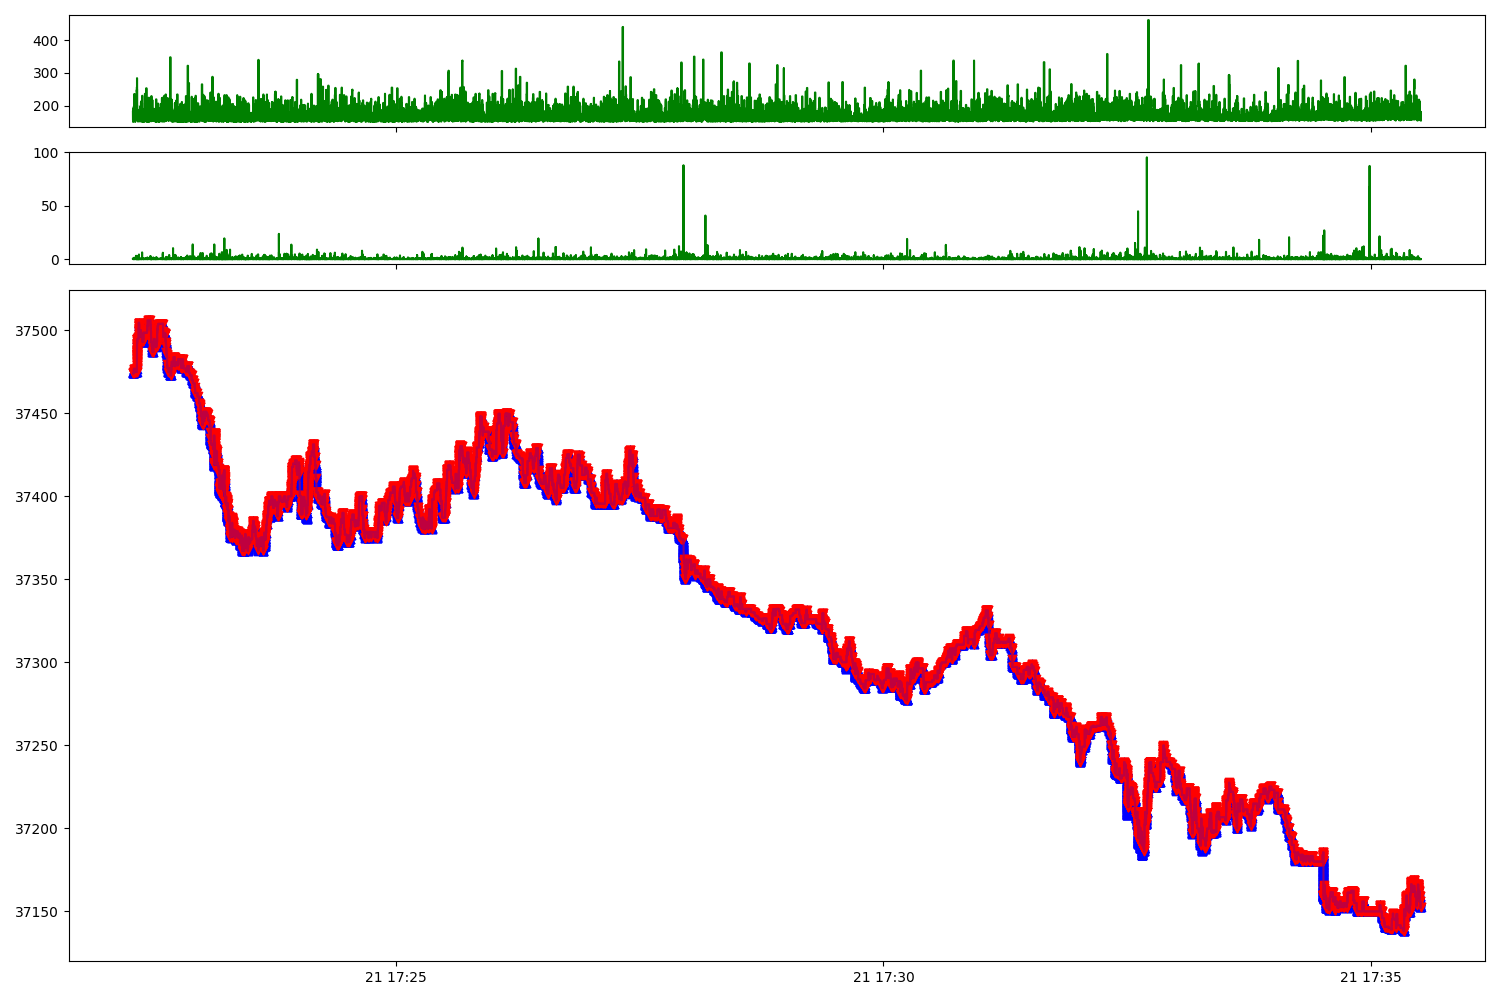

In [46]:
%matplotlib widget
f, (a0, a1, a2) = plt.subplots(3,1, gridspec_kw={'height_ratios': [1, 1, 6]},figsize=(15, 10),sharex=True)

a2.step(prices.index, prices.bid_price, c = 'blue', where = 'post',alpha = 0.5)
a2.step(prices.index, prices.ask_price, c = 'red', where = 'post',alpha = 0.5)

a2.scatter(tr[tr.side == 1].index, tr[tr.side == 1]['price'], c='blue', marker="^") #"v"
a2.scatter(tr[tr.side == 0].index, tr[tr.side == 0]['price'], c='red', marker="v") #

a0.step(tr.index, tr.lat, c ='green')
a1.step(tr.index, tr['size'], c ='green')

f.tight_layout()